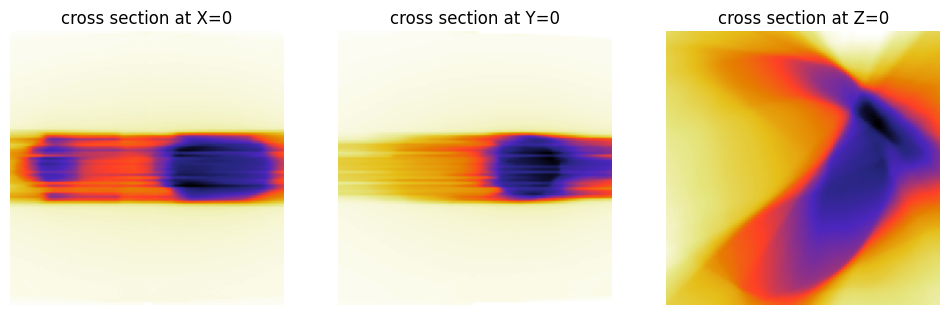

In [20]:
# Display the reconstructed 3D dose distribution
# Show three orthogonal cross-sections through the center of the volume

NimageZ = Nimage * sorted_images.shape[0] / sorted_images.shape[0]  # Z dimension size
Z_c = int(NimageZ / 2.0)  # Center slice in Z direction
X_c = int(Nimage / 2.0)   # Center slice in X direction
Y_c = int(Nimage / 2.0)   # Center slice in Y direction

# Create subplot with three cross-sections
figure, axis = plt.subplots(1, 3, figsize=(12, 12))

# Sagittal view (X=0 plane)
axis[0].imshow(rec_image[X_c, :, :].T, cmap='CMRmap_r')
axis[0].set_title('cross section at X=0')
axis[0].axis('off')

# Coronal view (Y=0 plane)
axis[1].imshow(rec_image[:, Y_c, :].T, cmap='CMRmap_r')
axis[1].set_title('cross section at Y=0')
axis[1].axis('off')

# Axial view (Z=0 plane)
axis[2].imshow(rec_image[:, :, Z_c].T, cmap='CMRmap_r')
axis[2].set_title('cross section at Z=0')
axis[2].axis('off')

plt.show()

In [21]:
# Load the reference TPS (Treatment Planning System) dose distribution for comparison
_TPS_pth = r"E:\CMC\pyprojects\radio_therapy\dose-3d\dataset\3DDose\RD.23022024.12 x 12.dcm"

tps_dcm = dcmread(_TPS_pth)  # Read the TPS DICOM file
tps_image = tps_dcm.pixel_array  # Extract the dose array

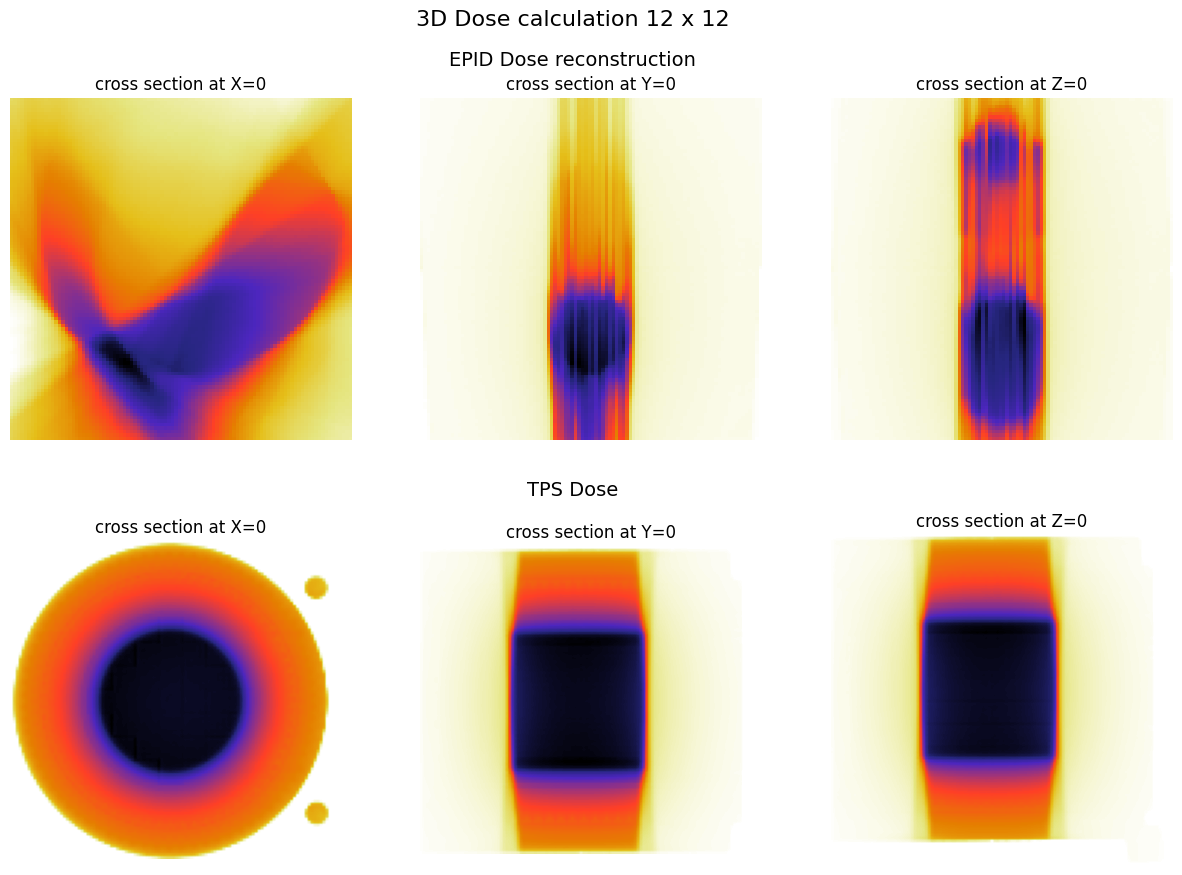

In [22]:
# Compare reconstructed EPID dose with TPS dose
# Display both distributions side by side for visual comparison

rec_image = np.transpose(rec_image, (2, 1, 0))  # Reorient image for display
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Add main title
fig.suptitle('3D Dose calculation 12 x 12', fontsize=16)
fig.subplots_adjust(top=0.9)  # Make room for the main title

# First row: EPID reconstructed dose
axs[0,0].imshow(rec_image[X_c,:,:].T, cmap='CMRmap_r')
axs[0,0].set_title('cross section at X=0')
axs[0,0].axis('off')
axs[0,1].imshow(rec_image[:,Y_c,:].T, cmap='CMRmap_r')
axs[0,1].set_title('cross section at Y=0')
axs[0,1].axis('off')
axs[0,2].imshow(rec_image[:,:,Z_c].T, cmap='CMRmap_r')
axs[0,2].set_title('cross section at Z=0')
axs[0,2].axis('off')
fig.text(0.5, 0.93, 'EPID Dose reconstruction', ha='center', va='center', fontsize=14)

# Second row: TPS reference dose
axs[1, 0].imshow(tps_image[X_c,:,:].T, cmap='CMRmap_r')
axs[1, 0].set_title('cross section at X=0')
axs[1, 0].axis('off')
axs[1, 1].imshow(tps_image[:,Y_c,:].T, cmap='CMRmap_r')
axs[1, 1].set_title('cross section at Y=0')
axs[1, 1].axis('off')
axs[1, 2].imshow(tps_image[:,:,Z_c].T, cmap='CMRmap_r')
axs[1, 2].set_title('cross section at Z=0')
axs[1, 2].axis('off')
fig.text(0.5, 0.5, 'TPS Dose', ha='center', va='center', fontsize=14)

plt.show()

In [23]:
# scaler

## Recon Image Center pixel

In [24]:
# Check the dose value at the center of the reconstructed volume
# This helps assess the reconstruction quality
rec_image[50, 50, 50]

966.4981015908426

## TPS Image center pixel

In [25]:
# Check the dose value at the center of the TPS reference dose
# This is used for calibration and comparison
_s = tps_image.shape
tps_image[int(_s[0]/2), int(_s[1]/2), int(_s[2]/2)]

998358

## Scaler

In [26]:
# Calculate scaling factor to match reconstructed dose to TPS dose
# This calibrates the EPID reconstruction to the reference dose scale
scaler = np.max(tps_dcm.pixel_array) / np.max(rec_image)
scaler

448.2461117359316

In [27]:
# scaler = np.max(tps_dcm.pixel_array)/np.max(rec_image)
# write_image = np.int32(rec_image*scaler)
# write_dicom = tps_dcm.copy()

# write_dicom.NumberOfFrames = '100'
# write_dicom.Rows = 100
# write_dicom.Columns = 100

# write_dicom.PixelData = np.int32(write_image).tobytes()

# dcmwrite(r"D:\CMC\pyprojects\radio_therapy\dose-3d\dataset\3DDose\EPID_12_t0.dcm", write_dicom)

# fitting a log function

In [28]:
# Apply logarithmic transformation and scaling to the reconstructed dose
# This empirical correction improves the match between EPID and TPS doses
# func_scalar = 0.1511 * np.log(rec_image) + 0.3897

func_scalar = np.exp((rec_image - 0.3897) / 0.1511)

# Prepare the scaled dose for DICOM export
write_image = np.int32(rec_image)
write_dicom = tps_dcm.copy()  # Copy the TPS DICOM structure

# Update DICOM metadata for the new image dimensions
write_dicom.NumberOfFrames = '100'
write_dicom.Rows = 100
write_dicom.Columns = 100

# Write the pixel data
write_dicom.PixelData = np.int32(write_image).tobytes()

# Save the reconstructed dose as a DICOM file
dcmwrite(r"E:\CMC\pyprojects\radio_therapy\dose-3d\dataset\3DDose\EPID_SIB_COMPLEX_T3_NOF.dcm", write_dicom)

C:\Users\Pintu\AppData\Local\Temp\ipykernel_22956\4183037942.py:5: RuntimeWarning: overflow encountered in exp
  func_scalar = np.exp((rec_image - 0.3897) / 0.1511)


In [29]:
# dcmwrite(r"D:\CMC\pyprojects\radio_therapy\dose-3d\dataset\3DDose\EPID_12_t0.dcm", write_dicom)

In [30]:
# write_dicom = dcmread(r"D:\CMC\pyprojects\radio_therapy\dose-3d\dataset\3DDose\EPID_CENTRAL_T1.dcm")
# img = write_dicom.pixel_array

In [31]:
# figure, axis=plt.subplots(1, 3,figsize=(12,12))
# axis[0].imshow(img[X_c,:,:].T, cmap='CMRmap_r')
# axis[0].set_title('cross section at X=0')
# axis[0].axis('off')
# axis[1].imshow(img[:,Y_c,:].T, cmap='CMRmap_r')
# axis[1].set_title('cross section at Y=0')
# axis[1].axis('off')
# axis[2].imshow(img[:,:,Z_c].T, cmap='CMRmap_r')
# axis[2].set_title('cross section at Z=0')
# axis[2].axis('off')
# # plt.savefig(directory+"rec_image.pdf",format='pdf',dpi=250)
# plt.show()